In [1]:
# This is my file.

In [2]:
# Dependencies.
# Data.
import pandas as pd
import numpy as np

# Visualization.
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

# ... More?
# ...

In [3]:
# In this file: we seek to create leaderboards and visualizations to assist us in answering the following questions:
# Which countries have the highest death rates related to smoking? lowest?
# What impact do these death rates have on the life expectancy of the country?
# ... Additional things:
# Rate of change of smoking deaths over time (for how many countries?)
# ... dunno'




# Steps: we need to grab our DataFrame.

In [4]:
# Read in the clean data from our csv.
filepath = '../data/clean_life_expectancy.csv'

# Make the DataFrame.
df = pd.read_csv(filepath, index_col = 0)

# Preview.
display(df.shape)
display(df.info())
display(df.head())

(1365, 10)

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 1364
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  1365 non-null   object 
 1   year                     1365 non-null   int64  
 2   life_expectancy          1365 non-null   float64
 3   smoking_deaths           1365 non-null   float64
 4   obesity_deaths           1365 non-null   float64
 5   deaths_by_suicide        1365 non-null   float64
 6   mean_years_of_schooling  1365 non-null   float64
 7   population               1365 non-null   int64  
 8   gdp                      1365 non-null   float64
 9   gov_health_expenditure   1365 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 117.3+ KB


None

,country,year,life_expectancy,smoking_deaths,obesity_deaths,deaths_by_suicide,mean_years_of_schooling,population,gdp,gov_health_expenditure
0,Afghanistan,2002,56.4538,4.484723,109.050644,7.85,1.522516,21000258,1280.4631,1.21
1,Afghanistan,2003,57.3445,4.593383,110.698310,7.72,1.579871,22645136,1292.3335,5.46
2,Afghanistan,2004,57.9436,4.665421,113.260590,7.77,1.637226,23553554,1260.0605,3.60
3,Afghanistan,2005,58.3608,4.708809,115.482414,7.64,1.694581,24411196,1352.3207,3.37
4,Afghanistan,2006,58.6844,4.746228,119.301240,7.56,1.776703,25442946,1366.9932,2.72


In [5]:
# We want to simplify this DataFrame to contain the columns that we will be needing.
# These are: country, year, life_expectancy, smoking_deaths, population.
df = df[['country', 'year', 'life_expectancy', 'smoking_deaths', 'population']]

# Preview.
display(df.shape)
display(df.info())
display(df.head())

(1365, 5)

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 1364
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          1365 non-null   object 
 1   year             1365 non-null   int64  
 2   life_expectancy  1365 non-null   float64
 3   smoking_deaths   1365 non-null   float64
 4   population       1365 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 64.0+ KB


None

,country,year,life_expectancy,smoking_deaths,population
0,Afghanistan,2002,56.4538,4.484723,21000258
1,Afghanistan,2003,57.3445,4.593383,22645136
2,Afghanistan,2004,57.9436,4.665421,23553554
3,Afghanistan,2005,58.3608,4.708809,24411196
4,Afghanistan,2006,58.6844,4.746228,25442946


In [6]:
# Everything should be done with preparing the data.
# Now... time to visualize. We need to figure out what will be best.
# 1. a line chart showing the delta of smoking deaths per country might be something useful (could be a bit cluttered though).
# 2. a scatter plot of smoking deaths vs. life expectancies could be useful.
df['year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

C:\Users\emteb\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emteb\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


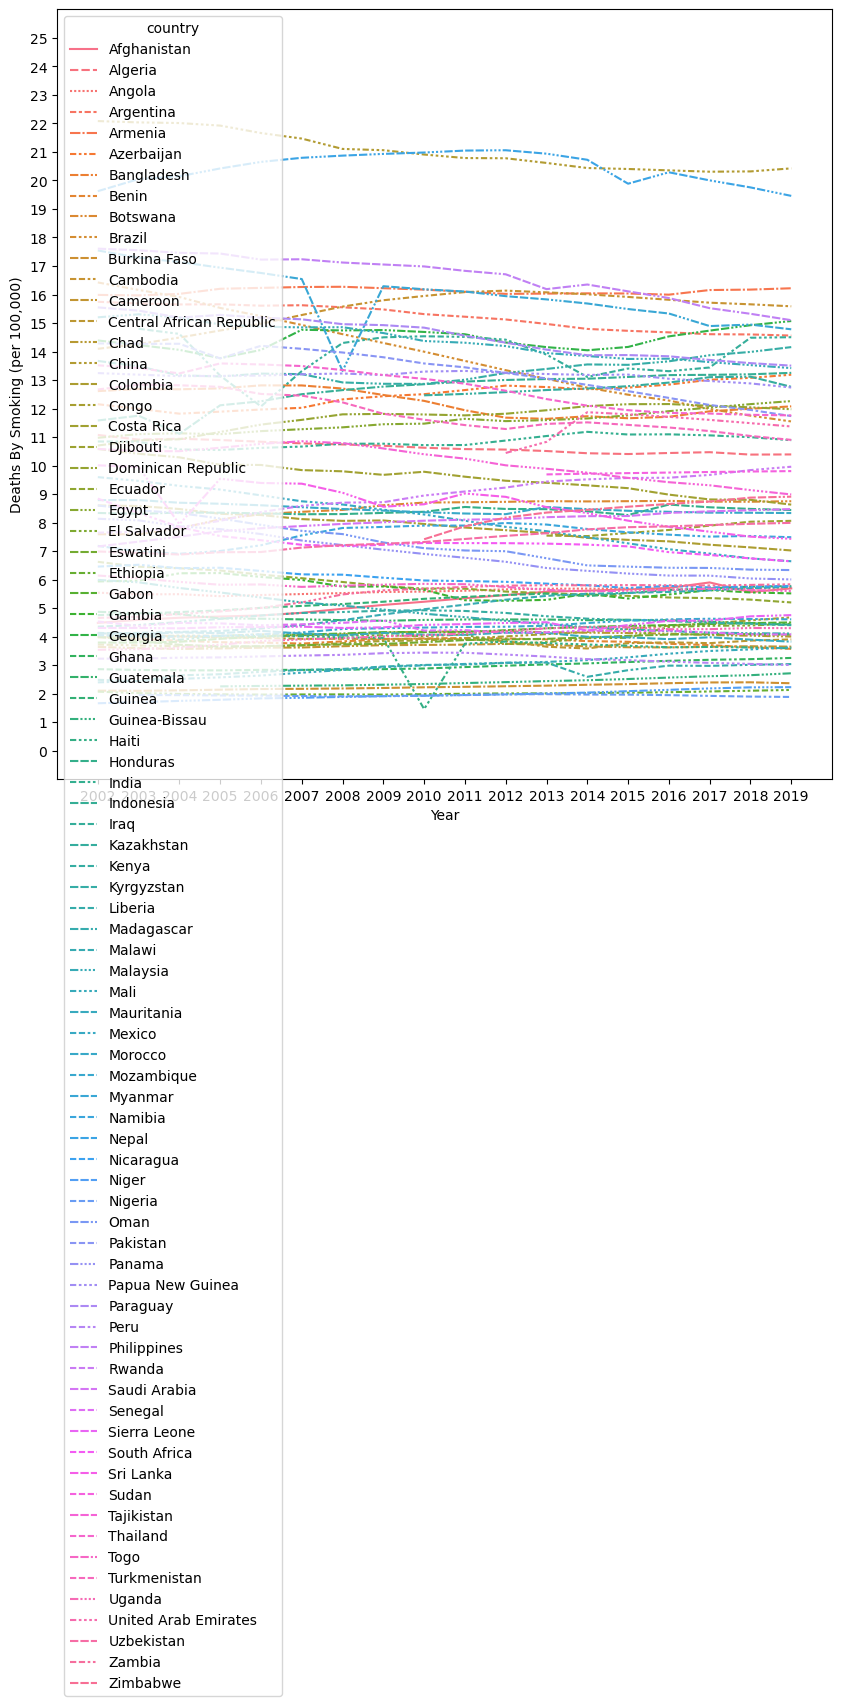

In [7]:
# Line Chart of Delta Smoking Deaths over time.
# Step 1: data.
x = df['year']
y = df['smoking_deaths']

style = df['country']

# Step 2: canvas.
plt.figure(figsize=(10, 10))

# Step 3: skeleton plot.
sns.lineplot(data = df,
             x = x,
             y = y,
             style = style,
             hue = 'country',
             legend = 'brief')

# Step 4: formatting.
plt.xlabel('Year')
plt.xticks(np.arange(2002, 2020, 1))
plt.xlim(2001, 2020)

plt.ylabel('Deaths By Smoking (per 100,000)')
plt.yticks(np.arange(0, 26, 1))
plt.ylim(-1, 26)

# Step 5: save/show.
plt.show()

# So... this graph sucks. Like we thought it would.

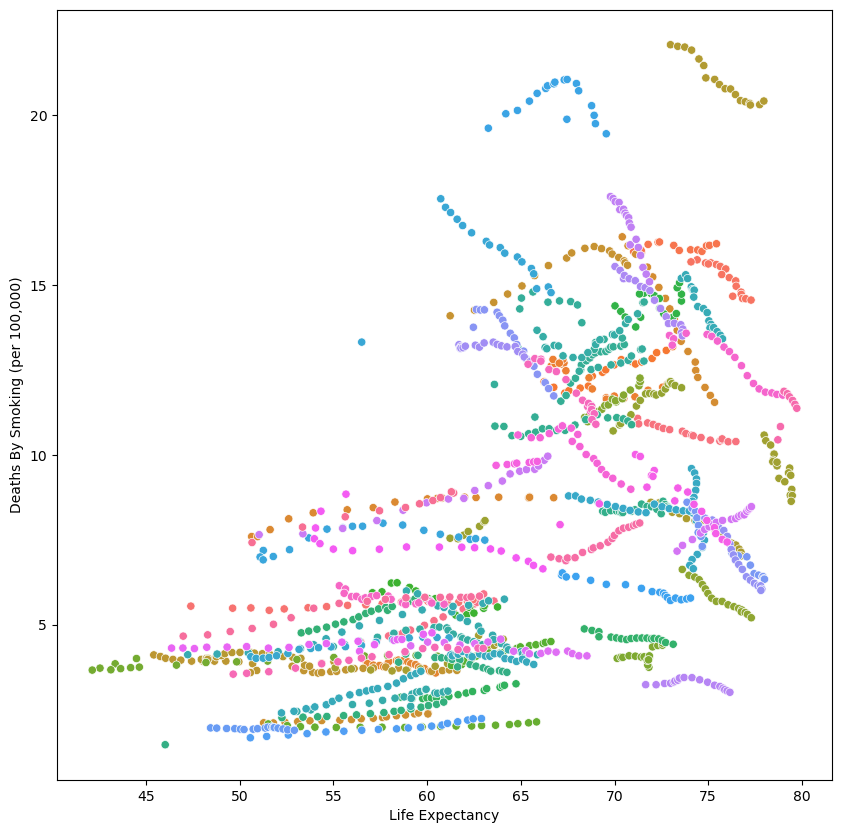

In [8]:
# Scatter Plot of Smoking Deaths vs. Life Expectancy
# Step 1: data.
x = df['life_expectancy']
y = df['smoking_deaths']

style = df['country']

# Step 2: canvas.
plt.figure(figsize=(10, 10))

# Step 3: skeleton plot.
sns.scatterplot(data = df,
             x = x,
             y = y,
             hue = 'country',
             legend = False)

# Step 4: formatting.
plt.xlabel('Life Expectancy')
# plt.xticks(np.arange(2002, 2020, 1))
# plt.xlim(2001, 2020)

plt.ylabel('Deaths By Smoking (per 100,000)')
# plt.yticks(np.arange(0, 26, 1))
# plt.ylim(-1, 26)

# Step 5: save/show.
plt.show()

In [9]:
# It is clear that we cannot do large-scale graphs of ALL the points of data regarding smoking deaths.
# We need to simplify this further or find different visualizations.
# ... 

In [10]:
# What are some options...
# Let's do a df.describe()
# Let's figure out which is best to summarize the data: mean, median.
# then plot that ig

In [11]:
df.describe()

,year,life_expectancy,smoking_deaths,population
count,1365.000000,1365.000000,1365.000000,1.365000e+03
mean,2010.675458,65.226921,8.221386,6.636804e+07
std,5.185222,8.134401,4.671504,2.092548e+08
min,2002.000000,42.125400,1.462455,9.717610e+05
25%,2006.000000,59.349100,4.167106,6.044130e+06
50%,2011.000000,65.731400,7.287102,1.523498e+07
75%,2015.000000,71.963800,11.967702,3.510727e+07
max,2019.000000,79.726200,22.081902,1.421864e+09


In [12]:
df.groupby('country').agg(['mean', 'median', 'std'])

year                   life_expectancy            \
                             mean  median       std            mean    median   
country                                                                         
Afghanistan           2010.500000  2010.5  5.338539       60.706917  61.13495   
Algeria               2010.500000  2010.5  5.338539       73.851694  73.96575   
Angola                2010.500000  2010.5  5.338539       56.437317  57.16095   
Argentina             2010.500000  2010.5  5.338539       75.902183  76.02995   
Armenia               2010.714286  2011.0  5.915151       73.255157  73.30685   
...                           ...     ...       ...             ...       ...   
Uganda                2010.500000  2010.5  5.338539       57.278650  57.50990   
United Arab Emirates  2015.500000  2015.5  2.449490       79.253450  79.27895   
Uzbekistan            2010.500000  2010.5  5.338539       69.225989  69.44205   
Zambia                2010.500000  2010.5  5.338539       56.303300  57.28495   
Zimbabwe              2014.500000  2014.5  3.027650       57.924240  59.21855   

                               smoking_deaths                       \
                           std           mean     median       std   
country                                                              
Afghanistan           2.264490       5.216688   5.288251  0.456762   
Algeria               1.717862      10.650280  10.603426  0.218150   
Angola                4.711916       5.591321   5.598154  0.094105   
Argentina             0.929325      15.199574  15.266941  0.443975   
Armenia               1.525564      16.109184  16.099052  0.108813   
...                        ...            ...        ...       ...   
Uganda                4.275366       4.034333   4.084155  0.279457   
United Arab Emirates  0.363931      11.391209  11.546614  0.502216   
Uzbekistan            1.504054       7.422734   7.375181  0.398605   
Zambia                5.296183       5.459506   5.715942  0.446552   
Zimbabwe              3.650156       8.401938   8.504893  0.470693   

                        population                            
                              mean      median           std  
country                                                       
Afghanistan           2.930117e+07  28719414.0  5.102265e+06  
Algeria               3.657804e+07  36199948.0  3.555006e+06  
Angola                2.424106e+07  23811658.0  4.706125e+06  
Argentina             4.134101e+07  41310430.0  2.196984e+06  
Armenia               2.949583e+06   2930362.0  9.815561e+04  
...                            ...         ...           ...  
Uganda                3.331422e+07  32818731.0  5.366195e+06  
United Arab Emirates  8.948011e+06   8955587.5  1.909207e+05  
Uzbekistan            2.898801e+07  28835845.0  2.350407e+06  
Zambia                1.416387e+07  14028959.5  2.505300e+06  
Zimbabwe              1.403076e+07  14005347.5  8.678907e+05  

[79 rows x 12 columns]

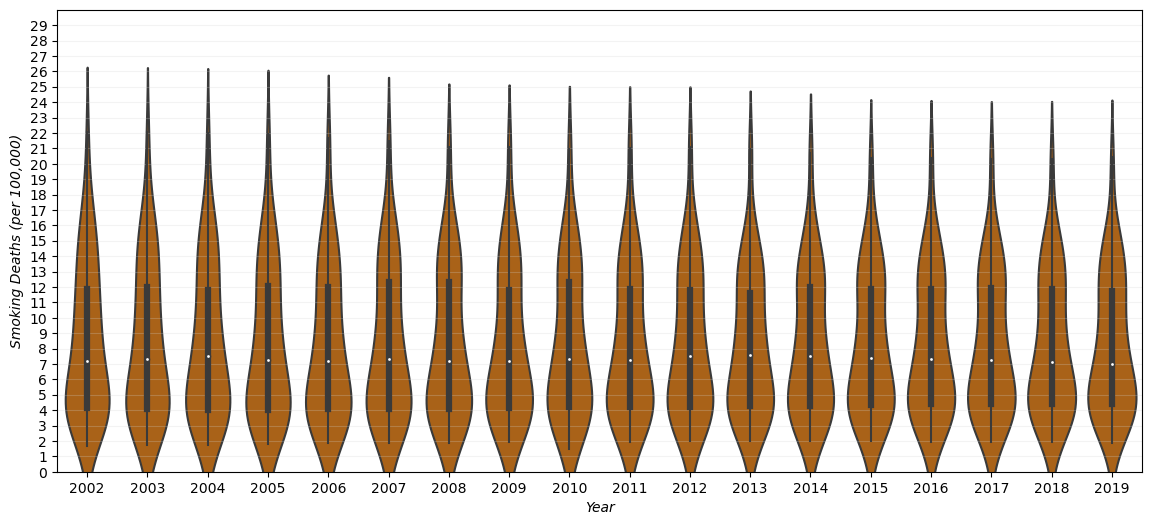

In [13]:
# Box Plot for Smoking Deaths.
# Step 1: data.

# Step 2: canvas.
plt.figure(figsize=(14, 6))

# Step 3: skeleton plot.
sns.violinplot(
    data = df,
    x = 'year',
    y = 'smoking_deaths',
    color = '#C16200'
)

# Step 4: formatting.
plt.xlabel('Year', fontsize = 10, fontstyle = 'italic')

plt.ylabel('Smoking Deaths (per 100,000)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(-10, 30, 1))
plt.ylim(0, 30)

plt.grid(axis = 'y', color = 'lightgray', alpha = .25)

# Step 5: save/show.
plt.show()


In [14]:
# Smoking deaths do not see variation or change over the years when looking at the entire dataset combined.
# These numbers are skewed left, it seems.

In [15]:
# Leaderboards.
# Combine the entries for each country into a new DataFrame.
mean_df = df.groupby(['country']).smoking_deaths.mean().reset_index()

# Preview.
display(mean_df.shape)
display(mean_df.info())
display(mean_df.head())

(79, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         79 non-null     object 
 1   smoking_deaths  79 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


None

,country,smoking_deaths
0,Afghanistan,5.216688
1,Algeria,10.650280
2,Angola,5.591321
3,Argentina,15.199574
4,Armenia,16.109184


In [16]:
# Highest smoking deaths in dataset.
mean_df.sort_values(by = 'smoking_deaths', ascending = False).head(5)

,country,smoking_deaths
15,China,21.037350
52,Nepal,20.423477
62,Philippines,16.649375
4,Armenia,16.109184
50,Myanmar,15.945509


In [17]:
# Lowest smoking deaths in dataset.
mean_df.sort_values(by = 'smoking_deaths').head(5)

,country,smoking_deaths
55,Nigeria,1.941492
54,Niger,1.955819
25,Ethiopia,2.023809
10,Burkina Faso,2.245588
32,Guinea-Bissau,2.436818


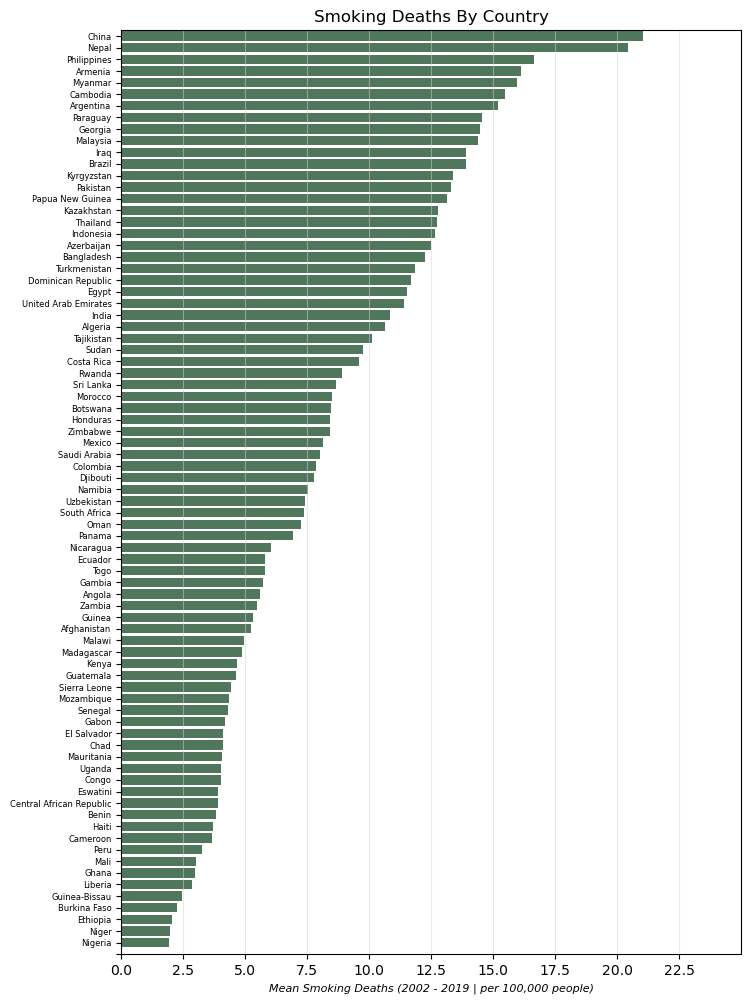

In [18]:
# Horizontal Bar Chart for mean smoking deaths by country.
plt.figure(figsize=(8, 12))

sns.barplot(
    data = mean_df.sort_values(by = 'smoking_deaths', ascending = False),
    x = 'smoking_deaths',
    y = 'country',
    color = '#4A7C59',
    width = .8,
)

plt.xlabel('Mean Smoking Deaths (2002 - 2019 | per 100,000 people)', fontsize = 8, fontstyle = 'italic')
plt.xticks(np.arange(0, 25, 2.5))
plt.xlim(0, 25)

plt.ylabel('')
plt.yticks(np.arange(0, 80, 1), fontsize = 6)

plt.title('Smoking Deaths By Country')

plt.grid(axis = 'x', color = 'lightgray', alpha = .5)

plt.show()

In [19]:
# OK. These are the highest and lowest for our dataset.
# We can use these to lead our investigation into the relationship between smoking deaths and life expectancy.

In [20]:
highest = [x for x in mean_df.sort_values(by = 'smoking_deaths', ascending = False).head(5).country]
print(highest)
lowest = [x for x in mean_df.sort_values(by = 'smoking_deaths').head(5).country]
print(lowest)

# Isolate the highest/lowest countries using loc.
# df.loc[df.country.isin(highest), :]
# df.loc[df.country.isin(lowest), :]

['China', 'Nepal', 'Philippines', 'Armenia', 'Myanmar']
['Nigeria', 'Niger', 'Ethiopia', 'Burkina Faso', 'Guinea-Bissau']


<Axes: xlabel='life_expectancy', ylabel='smoking_deaths'>

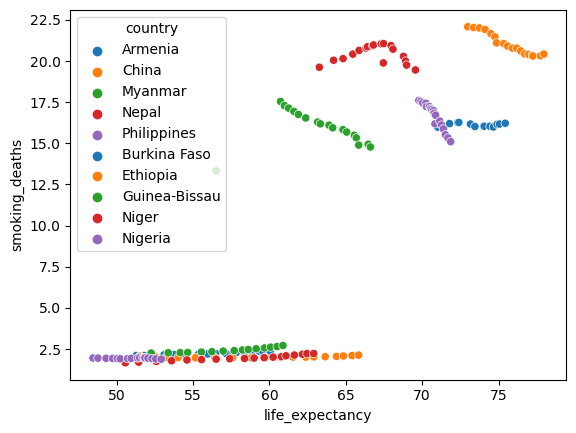

In [21]:
sns.scatterplot(
    data = df.loc[df.country.isin(highest), :],
    x = 'life_expectancy',
    y = 'smoking_deaths',
    hue = 'country'
)

sns.scatterplot(
    data = df.loc[df.country.isin(lowest), :],
    x = 'life_expectancy',
    y = 'smoking_deaths',
    hue = 'country'
)

In [22]:
# to-do:
# Do smoking deaths impact life expectancy? get better graphs for that ig